In [1]:
import os
os.chdir('C:/Users/nktmadan1/Desktop/widsdatathon2019')

In [3]:
!pip install tensorflow

smart-open 1.7.1 requires bz2file, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
!pip install Theano

  Running setup.py bdist_wheel for Theano: started
  Running setup.py bdist_wheel for Theano: finished with status 'done'
  Stored in directory: C:\Users\nktmadan1\AppData\Local\pip\Cache\wheels\88\fb\be\483910ff7e9f703f30a10605ad7605f3316493875c86637014
Successfully built Theano


smart-open 1.7.1 requires bz2file, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
!pip install cntk

smart-open 1.7.1 requires bz2file, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
!pip install keras

smart-open 1.7.1 requires bz2file, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
!pip install tqdm

smart-open 1.7.1 requires bz2file, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

C:\Users\nktmadan1\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
train = pd.read_csv('traininglabels.csv')
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('train_images/'+train['image_id'][i], target_size=(60,60,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 15244/15244 [06:55<00:00, 36.70it/s] 


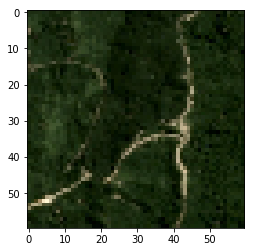

In [32]:
img2 = image.load_img('train_images/'+train['image_id'][10], target_size=(60,60,3), grayscale=False)
img2 = image.img_to_array(img2)
plt.imshow(img2/255) 
#see how image looks like

In [4]:
y = train['has_oilpalm']
y = to_categorical(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [77]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


# OTHER PARAMETER(3 cnn): run above line or below line for model


In [6]:
from keras.layers.advanced_activations import LeakyReLU

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(60,60,3),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(2, activation='softmax'))


# another model

In [48]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(60,60,3),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(512, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(2, activation='softmax'))

## another model with dropout

In [74]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,3)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(2, activation='softmax'))

In [7]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [ ]:
fashion_model.fit(X_train, y_train, batch_size = 64, epochs=40, validation_data=(X_test, y_test))

Train on 12195 samples, validate on 3049 samples
Epoch 1/40
12195/12195 [==============================] - ETA: 5:47 - loss: 0.7067 - acc: 0.109 - ETA: 4:04 - loss: 0.5652 - acc: 0.523 - ETA: 3:27 - loss: 0.4275 - acc: 0.671 - ETA: 3:10 - loss: 0.5898 - acc: 0.718 - ETA: 2:58 - loss: 0.5261 - acc: 0.765 - ETA: 2:52 - loss: 0.4580 - acc: 0.802 - ETA: 2:48 - loss: 0.4433 - acc: 0.819 - ETA: 2:44 - loss: 0.4242 - acc: 0.834 - ETA: 2:40 - loss: 0.4040 - acc: 0.849 - ETA: 2:41 - loss: 0.3886 - acc: 0.859 - ETA: 2:38 - loss: 0.3734 - acc: 0.867 - ETA: 2:36 - loss: 0.3551 - acc: 0.876 - ETA: 2:33 - loss: 0.3649 - acc: 0.876 - ETA: 2:31 - loss: 0.3453 - acc: 0.883 - ETA: 2:28 - loss: 0.3407 - acc: 0.886 - ETA: 2:26 - loss: 0.3391 - acc: 0.888 - ETA: 2:25 - loss: 0.3290 - acc: 0.892 - ETA: 2:23 - loss: 0.3246 - acc: 0.895 - ETA: 2:22 - loss: 0.3162 - acc: 0.898 - ETA: 2:22 - loss: 0.3109 - acc: 0.901 - ETA: 2:22 - loss: 0.3068 - acc: 0.902 - ETA: 2:22 - loss: 0.2999 - acc: 0.904 - ETA: 2:22 - l

12195/12195 [==============================] - ETA: 2:19 - loss: 0.1843 - acc: 0.953 - ETA: 2:19 - loss: 0.1345 - acc: 0.968 - ETA: 2:19 - loss: 0.1284 - acc: 0.968 - ETA: 2:19 - loss: 0.1201 - acc: 0.968 - ETA: 2:18 - loss: 0.1080 - acc: 0.968 - ETA: 2:19 - loss: 0.1271 - acc: 0.963 - ETA: 2:18 - loss: 0.1369 - acc: 0.962 - ETA: 2:17 - loss: 0.1436 - acc: 0.957 - ETA: 2:16 - loss: 0.1314 - acc: 0.961 - ETA: 2:15 - loss: 0.1243 - acc: 0.964 - ETA: 2:15 - loss: 0.1285 - acc: 0.961 - ETA: 2:14 - loss: 0.1316 - acc: 0.962 - ETA: 2:13 - loss: 0.1331 - acc: 0.960 - ETA: 2:13 - loss: 0.1317 - acc: 0.960 - ETA: 2:12 - loss: 0.1312 - acc: 0.959 - ETA: 2:11 - loss: 0.1405 - acc: 0.957 - ETA: 2:10 - loss: 0.1351 - acc: 0.958 - ETA: 2:10 - loss: 0.1390 - acc: 0.956 - ETA: 2:10 - loss: 0.1380 - acc: 0.956 - ETA: 2:10 - loss: 0.1346 - acc: 0.958 - ETA: 2:09 - loss: 0.1348 - acc: 0.957 - ETA: 2:08 - loss: 0.1324 - acc: 0.958 - ETA: 2:07 - loss: 0.1312 - acc: 0.957 - ETA: 2:06 - loss: 0.1304 - acc: 0

12195/12195 [==============================] - ETA: 2:21 - loss: 0.2016 - acc: 0.937 - ETA: 2:18 - loss: 0.1718 - acc: 0.953 - ETA: 2:21 - loss: 0.1735 - acc: 0.932 - ETA: 2:24 - loss: 0.1649 - acc: 0.937 - ETA: 2:25 - loss: 0.1516 - acc: 0.940 - ETA: 2:25 - loss: 0.1473 - acc: 0.942 - ETA: 2:23 - loss: 0.1267 - acc: 0.950 - ETA: 2:21 - loss: 0.1583 - acc: 0.943 - ETA: 2:20 - loss: 0.1670 - acc: 0.942 - ETA: 2:18 - loss: 0.1516 - acc: 0.948 - ETA: 2:17 - loss: 0.1480 - acc: 0.948 - ETA: 2:16 - loss: 0.1435 - acc: 0.950 - ETA: 2:15 - loss: 0.1420 - acc: 0.951 - ETA: 2:14 - loss: 0.1430 - acc: 0.953 - ETA: 2:13 - loss: 0.1408 - acc: 0.954 - ETA: 2:12 - loss: 0.1381 - acc: 0.955 - ETA: 2:11 - loss: 0.1336 - acc: 0.956 - ETA: 2:10 - loss: 0.1311 - acc: 0.957 - ETA: 2:09 - loss: 0.1294 - acc: 0.957 - ETA: 2:08 - loss: 0.1310 - acc: 0.955 - ETA: 2:07 - loss: 0.1271 - acc: 0.956 - ETA: 2:06 - loss: 0.1229 - acc: 0.958 - ETA: 2:06 - loss: 0.1210 - acc: 0.959 - ETA: 2:05 - loss: 0.1175 - acc: 0

12195/12195 [==============================] - ETA: 3:23 - loss: 0.1104 - acc: 0.984 - ETA: 3:23 - loss: 0.0801 - acc: 0.984 - ETA: 3:20 - loss: 0.0582 - acc: 0.989 - ETA: 3:16 - loss: 0.0787 - acc: 0.984 - ETA: 3:12 - loss: 0.0992 - acc: 0.975 - ETA: 3:09 - loss: 0.1008 - acc: 0.974 - ETA: 3:06 - loss: 0.0987 - acc: 0.973 - ETA: 3:04 - loss: 0.0957 - acc: 0.970 - ETA: 3:02 - loss: 0.0918 - acc: 0.972 - ETA: 3:00 - loss: 0.0870 - acc: 0.975 - ETA: 2:58 - loss: 0.0814 - acc: 0.977 - ETA: 2:57 - loss: 0.0759 - acc: 0.979 - ETA: 2:55 - loss: 0.0736 - acc: 0.979 - ETA: 2:54 - loss: 0.0703 - acc: 0.979 - ETA: 2:53 - loss: 0.0768 - acc: 0.977 - ETA: 2:51 - loss: 0.0737 - acc: 0.977 - ETA: 2:51 - loss: 0.0721 - acc: 0.977 - ETA: 2:50 - loss: 0.0701 - acc: 0.979 - ETA: 2:50 - loss: 0.0706 - acc: 0.978 - ETA: 2:49 - loss: 0.0685 - acc: 0.978 - ETA: 2:48 - loss: 0.0696 - acc: 0.978 - ETA: 2:47 - loss: 0.0679 - acc: 0.978 - ETA: 2:46 - loss: 0.0696 - acc: 0.976 - ETA: 2:45 - loss: 0.0671 - acc: 0

12195/12195 [==============================] - ETA: 3:06 - loss: 0.1419 - acc: 0.968 - ETA: 3:01 - loss: 0.1039 - acc: 0.976 - ETA: 3:00 - loss: 0.0850 - acc: 0.984 - ETA: 2:59 - loss: 0.0763 - acc: 0.980 - ETA: 3:00 - loss: 0.0795 - acc: 0.975 - ETA: 2:59 - loss: 0.0820 - acc: 0.974 - ETA: 2:59 - loss: 0.0729 - acc: 0.977 - ETA: 3:00 - loss: 0.0725 - acc: 0.978 - ETA: 3:01 - loss: 0.0809 - acc: 0.975 - ETA: 3:00 - loss: 0.0774 - acc: 0.976 - ETA: 2:59 - loss: 0.0739 - acc: 0.978 - ETA: 2:58 - loss: 0.0711 - acc: 0.980 - ETA: 2:56 - loss: 0.0762 - acc: 0.979 - ETA: 2:55 - loss: 0.0726 - acc: 0.981 - ETA: 2:53 - loss: 0.0704 - acc: 0.981 - ETA: 2:52 - loss: 0.0684 - acc: 0.981 - ETA: 2:51 - loss: 0.0651 - acc: 0.982 - ETA: 2:50 - loss: 0.0626 - acc: 0.983 - ETA: 2:49 - loss: 0.0619 - acc: 0.983 - ETA: 2:47 - loss: 0.0639 - acc: 0.983 - ETA: 2:46 - loss: 0.0622 - acc: 0.984 - ETA: 2:45 - loss: 0.0626 - acc: 0.983 - ETA: 2:44 - loss: 0.0639 - acc: 0.981 - ETA: 2:43 - loss: 0.0619 - acc: 0

12195/12195 [==============================] - ETA: 2:21 - loss: 0.0106 - acc: 1.000 - ETA: 2:18 - loss: 0.0076 - acc: 1.000 - ETA: 2:22 - loss: 0.0062 - acc: 1.000 - ETA: 2:25 - loss: 0.0356 - acc: 0.992 - ETA: 2:28 - loss: 0.0386 - acc: 0.987 - ETA: 2:26 - loss: 0.0542 - acc: 0.981 - ETA: 2:24 - loss: 0.0495 - acc: 0.982 - ETA: 2:22 - loss: 0.0526 - acc: 0.980 - ETA: 2:20 - loss: 0.0585 - acc: 0.979 - ETA: 2:19 - loss: 0.0548 - acc: 0.981 - ETA: 2:18 - loss: 0.0621 - acc: 0.975 - ETA: 2:19 - loss: 0.0621 - acc: 0.976 - ETA: 2:18 - loss: 0.0601 - acc: 0.978 - ETA: 2:16 - loss: 0.0673 - acc: 0.976 - ETA: 2:15 - loss: 0.0657 - acc: 0.977 - ETA: 2:14 - loss: 0.0657 - acc: 0.976 - ETA: 2:13 - loss: 0.0638 - acc: 0.977 - ETA: 2:12 - loss: 0.0609 - acc: 0.978 - ETA: 2:10 - loss: 0.0584 - acc: 0.979 - ETA: 2:10 - loss: 0.0570 - acc: 0.979 - ETA: 2:09 - loss: 0.0577 - acc: 0.979 - ETA: 2:08 - loss: 0.0584 - acc: 0.978 - ETA: 2:07 - loss: 0.0603 - acc: 0.976 - ETA: 2:07 - loss: 0.0630 - acc: 0

12195/12195 [==============================] - ETA: 2:20 - loss: 0.0020 - acc: 1.000 - ETA: 2:18 - loss: 0.0061 - acc: 1.000 - ETA: 2:18 - loss: 0.0052 - acc: 1.000 - ETA: 2:19 - loss: 0.0247 - acc: 0.996 - ETA: 2:18 - loss: 0.0358 - acc: 0.993 - ETA: 2:17 - loss: 0.0338 - acc: 0.992 - ETA: 2:19 - loss: 0.0318 - acc: 0.993 - ETA: 2:20 - loss: 0.0301 - acc: 0.994 - ETA: 2:20 - loss: 0.0346 - acc: 0.991 - ETA: 2:21 - loss: 0.0361 - acc: 0.989 - ETA: 2:20 - loss: 0.0367 - acc: 0.988 - ETA: 2:19 - loss: 0.0343 - acc: 0.989 - ETA: 2:18 - loss: 0.0337 - acc: 0.990 - ETA: 2:16 - loss: 0.0335 - acc: 0.991 - ETA: 2:15 - loss: 0.0334 - acc: 0.990 - ETA: 2:14 - loss: 0.0373 - acc: 0.989 - ETA: 2:13 - loss: 0.0367 - acc: 0.989 - ETA: 2:12 - loss: 0.0356 - acc: 0.988 - ETA: 2:11 - loss: 0.0359 - acc: 0.988 - ETA: 2:10 - loss: 0.0359 - acc: 0.988 - ETA: 2:10 - loss: 0.0360 - acc: 0.988 - ETA: 2:09 - loss: 0.0350 - acc: 0.988 - ETA: 2:08 - loss: 0.0341 - acc: 0.989 - ETA: 2:07 - loss: 0.0361 - acc: 0

12195/12195 [==============================] - ETA: 2:26 - loss: 0.0023 - acc: 1.000 - ETA: 2:24 - loss: 0.0021 - acc: 1.000 - ETA: 2:21 - loss: 0.0131 - acc: 0.994 - ETA: 2:20 - loss: 0.0099 - acc: 0.996 - ETA: 2:19 - loss: 0.0080 - acc: 0.996 - ETA: 2:18 - loss: 0.0264 - acc: 0.994 - ETA: 2:17 - loss: 0.0256 - acc: 0.993 - ETA: 2:19 - loss: 0.0248 - acc: 0.994 - ETA: 2:20 - loss: 0.0244 - acc: 0.993 - ETA: 2:20 - loss: 0.0229 - acc: 0.993 - ETA: 2:21 - loss: 0.0237 - acc: 0.992 - ETA: 2:20 - loss: 0.0219 - acc: 0.993 - ETA: 2:19 - loss: 0.0243 - acc: 0.992 - ETA: 2:18 - loss: 0.0291 - acc: 0.991 - ETA: 2:17 - loss: 0.0303 - acc: 0.990 - ETA: 2:16 - loss: 0.0325 - acc: 0.989 - ETA: 2:15 - loss: 0.0336 - acc: 0.989 - ETA: 2:14 - loss: 0.0331 - acc: 0.988 - ETA: 2:13 - loss: 0.0346 - acc: 0.988 - ETA: 2:12 - loss: 0.0340 - acc: 0.989 - ETA: 2:11 - loss: 0.0347 - acc: 0.988 - ETA: 2:10 - loss: 0.0368 - acc: 0.987 - ETA: 2:09 - loss: 0.0370 - acc: 0.987 - ETA: 2:08 - loss: 0.0384 - acc: 0

12195/12195 [==============================] - ETA: 2:22 - loss: 0.0626 - acc: 0.968 - ETA: 2:19 - loss: 0.0519 - acc: 0.968 - ETA: 2:19 - loss: 0.0391 - acc: 0.979 - ETA: 2:18 - loss: 0.0524 - acc: 0.976 - ETA: 2:17 - loss: 0.0434 - acc: 0.981 - ETA: 2:19 - loss: 0.0390 - acc: 0.981 - ETA: 2:20 - loss: 0.0360 - acc: 0.984 - ETA: 2:19 - loss: 0.0317 - acc: 0.986 - ETA: 2:18 - loss: 0.0315 - acc: 0.986 - ETA: 2:17 - loss: 0.0300 - acc: 0.987 - ETA: 2:16 - loss: 0.0283 - acc: 0.988 - ETA: 2:15 - loss: 0.0265 - acc: 0.989 - ETA: 2:15 - loss: 0.0274 - acc: 0.988 - ETA: 2:16 - loss: 0.0265 - acc: 0.988 - ETA: 2:15 - loss: 0.0252 - acc: 0.989 - ETA: 2:15 - loss: 0.0280 - acc: 0.988 - ETA: 2:14 - loss: 0.0274 - acc: 0.988 - ETA: 2:12 - loss: 0.0267 - acc: 0.988 - ETA: 2:11 - loss: 0.0290 - acc: 0.988 - ETA: 2:10 - loss: 0.0287 - acc: 0.989 - ETA: 2:09 - loss: 0.0279 - acc: 0.989 - ETA: 2:08 - loss: 0.0269 - acc: 0.990 - ETA: 2:08 - loss: 0.0261 - acc: 0.990 - ETA: 2:07 - loss: 0.0282 - acc: 0

12195/12195 [==============================] - ETA: 2:40 - loss: 0.0069 - acc: 1.000 - ETA: 2:32 - loss: 0.0049 - acc: 1.000 - ETA: 2:32 - loss: 0.0058 - acc: 1.000 - ETA: 2:35 - loss: 0.0051 - acc: 1.000 - ETA: 2:32 - loss: 0.0121 - acc: 0.996 - ETA: 2:31 - loss: 0.0312 - acc: 0.989 - ETA: 2:30 - loss: 0.0275 - acc: 0.991 - ETA: 2:29 - loss: 0.0249 - acc: 0.992 - ETA: 2:30 - loss: 0.0250 - acc: 0.991 - ETA: 2:29 - loss: 0.0231 - acc: 0.992 - ETA: 2:29 - loss: 0.0232 - acc: 0.991 - ETA: 2:29 - loss: 0.0223 - acc: 0.992 - ETA: 2:28 - loss: 0.0214 - acc: 0.992 - ETA: 2:27 - loss: 0.0201 - acc: 0.993 - ETA: 2:25 - loss: 0.0195 - acc: 0.993 - ETA: 2:26 - loss: 0.0185 - acc: 0.994 - ETA: 2:27 - loss: 0.0177 - acc: 0.994 - ETA: 2:26 - loss: 0.0175 - acc: 0.994 - ETA: 2:25 - loss: 0.0186 - acc: 0.994 - ETA: 2:23 - loss: 0.0186 - acc: 0.993 - ETA: 2:22 - loss: 0.0182 - acc: 0.994 - ETA: 2:21 - loss: 0.0174 - acc: 0.994 - ETA: 2:20 - loss: 0.0171 - acc: 0.994 - ETA: 2:22 - loss: 0.0164 - acc: 0

12195/12195 [==============================] - ETA: 2:20 - loss: 0.0044 - acc: 1.000 - ETA: 2:21 - loss: 0.0151 - acc: 0.992 - ETA: 2:20 - loss: 0.0105 - acc: 0.994 - ETA: 2:19 - loss: 0.0085 - acc: 0.996 - ETA: 2:17 - loss: 0.0071 - acc: 0.996 - ETA: 2:16 - loss: 0.0067 - acc: 0.997 - ETA: 2:16 - loss: 0.0237 - acc: 0.993 - ETA: 2:17 - loss: 0.0207 - acc: 0.994 - ETA: 2:17 - loss: 0.0185 - acc: 0.994 - ETA: 2:17 - loss: 0.0178 - acc: 0.995 - ETA: 2:16 - loss: 0.0165 - acc: 0.995 - ETA: 2:15 - loss: 0.0153 - acc: 0.996 - ETA: 2:14 - loss: 0.0146 - acc: 0.996 - ETA: 2:13 - loss: 0.0154 - acc: 0.995 - ETA: 2:12 - loss: 0.0146 - acc: 0.995 - ETA: 2:11 - loss: 0.0141 - acc: 0.996 - ETA: 2:11 - loss: 0.0141 - acc: 0.996 - ETA: 2:11 - loss: 0.0135 - acc: 0.996 - ETA: 2:10 - loss: 0.0130 - acc: 0.996 - ETA: 2:09 - loss: 0.0128 - acc: 0.996 - ETA: 2:09 - loss: 0.0123 - acc: 0.997 - ETA: 2:08 - loss: 0.0118 - acc: 0.997 - ETA: 2:07 - loss: 0.0135 - acc: 0.996 - ETA: 2:07 - loss: 0.0132 - acc: 0

12195/12195 [==============================] - ETA: 2:18 - loss: 0.0012 - acc: 1.000 - ETA: 2:20 - loss: 0.0015 - acc: 1.000 - ETA: 2:18 - loss: 0.0034 - acc: 1.000 - ETA: 2:19 - loss: 0.0044 - acc: 1.000 - ETA: 2:18 - loss: 0.0055 - acc: 1.000 - ETA: 2:17 - loss: 0.0061 - acc: 1.000 - ETA: 2:18 - loss: 0.0065 - acc: 1.000 - ETA: 2:19 - loss: 0.0062 - acc: 1.000 - ETA: 2:19 - loss: 0.0063 - acc: 1.000 - ETA: 2:18 - loss: 0.0059 - acc: 1.000 - ETA: 2:17 - loss: 0.0054 - acc: 1.000 - ETA: 2:16 - loss: 0.0050 - acc: 1.000 - ETA: 2:14 - loss: 0.0047 - acc: 1.000 - ETA: 2:13 - loss: 0.0076 - acc: 0.997 - ETA: 2:13 - loss: 0.0071 - acc: 0.997 - ETA: 2:12 - loss: 0.0068 - acc: 0.998 - ETA: 2:13 - loss: 0.0098 - acc: 0.997 - ETA: 2:13 - loss: 0.0095 - acc: 0.997 - ETA: 2:15 - loss: 0.0105 - acc: 0.996 - ETA: 2:15 - loss: 0.0101 - acc: 0.996 - ETA: 2:15 - loss: 0.0098 - acc: 0.997 - ETA: 2:15 - loss: 0.0093 - acc: 0.997 - ETA: 2:15 - loss: 0.0090 - acc: 0.997 - ETA: 2:14 - loss: 0.0086 - acc: 0

12195/12195 [==============================] - ETA: 2:21 - loss: 9.4857e-04 - acc: 1.000 - ETA: 2:21 - loss: 0.0425 - acc: 0.9922    - ETA: 2:21 - loss: 0.0548 - acc: 0.984 - ETA: 2:19 - loss: 0.0611 - acc: 0.984 - ETA: 2:18 - loss: 0.0505 - acc: 0.987 - ETA: 2:17 - loss: 0.0424 - acc: 0.989 - ETA: 2:19 - loss: 0.0367 - acc: 0.991 - ETA: 2:21 - loss: 0.0370 - acc: 0.990 - ETA: 2:20 - loss: 0.0401 - acc: 0.989 - ETA: 2:19 - loss: 0.0368 - acc: 0.990 - ETA: 2:18 - loss: 0.0339 - acc: 0.991 - ETA: 2:17 - loss: 0.0318 - acc: 0.992 - ETA: 2:16 - loss: 0.0306 - acc: 0.991 - ETA: 2:15 - loss: 0.0285 - acc: 0.992 - ETA: 2:13 - loss: 0.0271 - acc: 0.992 - ETA: 2:12 - loss: 0.0320 - acc: 0.990 - ETA: 2:12 - loss: 0.0315 - acc: 0.989 - ETA: 2:11 - loss: 0.0301 - acc: 0.990 - ETA: 2:10 - loss: 0.0287 - acc: 0.991 - ETA: 2:09 - loss: 0.0279 - acc: 0.991 - ETA: 2:08 - loss: 0.0268 - acc: 0.991 - ETA: 2:07 - loss: 0.0274 - acc: 0.991 - ETA: 2:06 - loss: 0.0274 - acc: 0.991 - ETA: 2:05 - loss: 0.0265 

12195/12195 [==============================] - ETA: 2:40 - loss: 0.0012 - acc: 1.000 - ETA: 2:52 - loss: 6.3784e-04 - acc: 1.000 - ETA: 2:59 - loss: 4.3581e-04 - acc: 1.000 - ETA: 2:53 - loss: 3.4401e-04 - acc: 1.000 - ETA: 2:46 - loss: 2.9220e-04 - acc: 1.000 - ETA: 2:44 - loss: 0.0075 - acc: 0.9974    - ETA: 2:42 - loss: 0.0089 - acc: 0.995 - ETA: 2:42 - loss: 0.0087 - acc: 0.996 - ETA: 2:39 - loss: 0.0078 - acc: 0.996 - ETA: 2:38 - loss: 0.0070 - acc: 0.996 - ETA: 2:35 - loss: 0.0065 - acc: 0.997 - ETA: 2:33 - loss: 0.0061 - acc: 0.997 - ETA: 2:33 - loss: 0.0059 - acc: 0.997 - ETA: 2:35 - loss: 0.0061 - acc: 0.997 - ETA: 2:34 - loss: 0.0059 - acc: 0.997 - ETA: 2:35 - loss: 0.0056 - acc: 0.998 - ETA: 2:36 - loss: 0.0054 - acc: 0.998 - ETA: 2:35 - loss: 0.0053 - acc: 0.998 - ETA: 2:33 - loss: 0.0051 - acc: 0.998 - ETA: 2:32 - loss: 0.0049 - acc: 0.998 - ETA: 2:30 - loss: 0.0047 - acc: 0.998 - ETA: 2:29 - loss: 0.0048 - acc: 0.998 - ETA: 2:28 - loss: 0.0048 - acc: 0.998 - ETA: 2:28 - l

12195/12195 [==============================] - ETA: 2:20 - loss: 4.1483e-04 - acc: 1.000 - ETA: 2:19 - loss: 0.0069 - acc: 1.0000    - ETA: 2:19 - loss: 0.0047 - acc: 1.000 - ETA: 2:20 - loss: 0.0055 - acc: 1.000 - ETA: 2:19 - loss: 0.0048 - acc: 1.000 - ETA: 2:19 - loss: 0.0043 - acc: 1.000 - ETA: 2:19 - loss: 0.0106 - acc: 0.997 - ETA: 2:17 - loss: 0.0103 - acc: 0.998 - ETA: 2:16 - loss: 0.0092 - acc: 0.998 - ETA: 2:15 - loss: 0.0087 - acc: 0.998 - ETA: 2:14 - loss: 0.0080 - acc: 0.998 - ETA: 2:13 - loss: 0.0080 - acc: 0.998 - ETA: 2:12 - loss: 0.0074 - acc: 0.998 - ETA: 2:12 - loss: 0.0070 - acc: 0.998 - ETA: 2:11 - loss: 0.0066 - acc: 0.999 - ETA: 2:11 - loss: 0.0066 - acc: 0.999 - ETA: 2:11 - loss: 0.0063 - acc: 0.999 - ETA: 2:11 - loss: 0.0062 - acc: 0.999 - ETA: 2:11 - loss: 0.0059 - acc: 0.999 - ETA: 2:11 - loss: 0.0059 - acc: 0.999 - ETA: 2:11 - loss: 0.0056 - acc: 0.999 - ETA: 2:10 - loss: 0.0055 - acc: 0.999 - ETA: 2:09 - loss: 0.0053 - acc: 0.999 - ETA: 2:08 - loss: 0.0052 

12195/12195 [==============================] - ETA: 2:24 - loss: 3.0379e-05 - acc: 1.000 - ETA: 2:24 - loss: 4.8813e-05 - acc: 1.000 - ETA: 2:24 - loss: 1.3077e-04 - acc: 1.000 - ETA: 2:25 - loss: 0.0011 - acc: 1.0000    - ETA: 2:25 - loss: 0.0010 - acc: 1.000 - ETA: 2:24 - loss: 0.0014 - acc: 1.000 - ETA: 2:23 - loss: 0.0013 - acc: 1.000 - ETA: 2:22 - loss: 0.0015 - acc: 1.000 - ETA: 2:21 - loss: 0.0014 - acc: 1.000 - ETA: 2:20 - loss: 0.0012 - acc: 1.000 - ETA: 2:19 - loss: 0.0011 - acc: 1.000 - ETA: 2:18 - loss: 0.0010 - acc: 1.000 - ETA: 2:17 - loss: 9.6207e-04 - acc: 1.000 - ETA: 2:16 - loss: 9.3181e-04 - acc: 1.000 - ETA: 2:15 - loss: 8.7050e-04 - acc: 1.000 - ETA: 2:14 - loss: 8.3893e-04 - acc: 1.000 - ETA: 2:13 - loss: 7.9085e-04 - acc: 1.000 - ETA: 2:12 - loss: 7.5692e-04 - acc: 1.000 - ETA: 2:11 - loss: 7.2670e-04 - acc: 1.000 - ETA: 2:11 - loss: 6.9836e-04 - acc: 1.000 - ETA: 2:11 - loss: 6.9627e-04 - acc: 1.000 - ETA: 2:10 - loss: 6.7533e-04 - acc: 1.000 - ETA: 2:09 - loss:

12195/12195 [==============================] - ETA: 2:20 - loss: 0.0011 - acc: 1.000 - ETA: 2:17 - loss: 6.5064e-04 - acc: 1.000 - ETA: 2:18 - loss: 6.3273e-04 - acc: 1.000 - ETA: 2:19 - loss: 5.1927e-04 - acc: 1.000 - ETA: 2:19 - loss: 4.6400e-04 - acc: 1.000 - ETA: 2:22 - loss: 3.9892e-04 - acc: 1.000 - ETA: 2:24 - loss: 3.5496e-04 - acc: 1.000 - ETA: 2:25 - loss: 3.1594e-04 - acc: 1.000 - ETA: 2:23 - loss: 2.8248e-04 - acc: 1.000 - ETA: 2:22 - loss: 2.6602e-04 - acc: 1.000 - ETA: 2:21 - loss: 2.5287e-04 - acc: 1.000 - ETA: 2:19 - loss: 2.3770e-04 - acc: 1.000 - ETA: 2:18 - loss: 2.2157e-04 - acc: 1.000 - ETA: 2:17 - loss: 3.7731e-04 - acc: 1.000 - ETA: 2:16 - loss: 3.5276e-04 - acc: 1.000 - ETA: 2:15 - loss: 5.6296e-04 - acc: 1.000 - ETA: 2:14 - loss: 5.6739e-04 - acc: 1.000 - ETA: 2:13 - loss: 5.4263e-04 - acc: 1.000 - ETA: 2:12 - loss: 5.4253e-04 - acc: 1.000 - ETA: 2:11 - loss: 5.2155e-04 - acc: 1.000 - ETA: 2:10 - loss: 5.0507e-04 - acc: 1.000 - ETA: 2:09 - loss: 4.8666e-04 - ac

12195/12195 [==============================] - ETA: 2:36 - loss: 0.0020 - acc: 1.000 - ETA: 2:36 - loss: 0.0016 - acc: 1.000 - ETA: 2:34 - loss: 0.0124 - acc: 0.989 - ETA: 2:34 - loss: 0.0102 - acc: 0.992 - ETA: 2:33 - loss: 0.0097 - acc: 0.993 - ETA: 2:29 - loss: 0.0084 - acc: 0.994 - ETA: 2:29 - loss: 0.0073 - acc: 0.995 - ETA: 2:30 - loss: 0.0065 - acc: 0.996 - ETA: 2:30 - loss: 0.0064 - acc: 0.996 - ETA: 2:28 - loss: 0.0058 - acc: 0.996 - ETA: 2:25 - loss: 0.0053 - acc: 0.997 - ETA: 2:23 - loss: 0.0060 - acc: 0.997 - ETA: 2:22 - loss: 0.0056 - acc: 0.997 - ETA: 2:21 - loss: 0.0055 - acc: 0.997 - ETA: 2:19 - loss: 0.0053 - acc: 0.997 - ETA: 2:18 - loss: 0.0087 - acc: 0.997 - ETA: 2:17 - loss: 0.0086 - acc: 0.997 - ETA: 2:16 - loss: 0.0081 - acc: 0.997 - ETA: 2:14 - loss: 0.0077 - acc: 0.997 - ETA: 2:13 - loss: 0.0075 - acc: 0.997 - ETA: 2:12 - loss: 0.0072 - acc: 0.997 - ETA: 2:11 - loss: 0.0069 - acc: 0.997 - ETA: 2:12 - loss: 0.0068 - acc: 0.998 - ETA: 2:11 - loss: 0.0066 - acc: 0

12195/12195 [==============================] - ETA: 2:20 - loss: 0.0053 - acc: 1.000 - ETA: 2:34 - loss: 0.0028 - acc: 1.000 - ETA: 2:34 - loss: 0.0044 - acc: 1.000 - ETA: 2:36 - loss: 0.0036 - acc: 1.000 - ETA: 2:37 - loss: 0.0029 - acc: 1.000 - ETA: 2:34 - loss: 0.0027 - acc: 1.000 - ETA: 2:31 - loss: 0.0024 - acc: 1.000 - ETA: 2:29 - loss: 0.0038 - acc: 0.998 - ETA: 2:27 - loss: 0.0035 - acc: 0.998 - ETA: 2:26 - loss: 0.0032 - acc: 0.998 - ETA: 2:24 - loss: 0.0033 - acc: 0.998 - ETA: 2:23 - loss: 0.0032 - acc: 0.998 - ETA: 2:21 - loss: 0.0032 - acc: 0.998 - ETA: 2:20 - loss: 0.0030 - acc: 0.998 - ETA: 2:19 - loss: 0.0029 - acc: 0.999 - ETA: 2:18 - loss: 0.0029 - acc: 0.999 - ETA: 2:18 - loss: 0.0029 - acc: 0.999 - ETA: 2:18 - loss: 0.0028 - acc: 0.999 - ETA: 2:17 - loss: 0.0027 - acc: 0.999 - ETA: 2:16 - loss: 0.0026 - acc: 0.999 - ETA: 2:15 - loss: 0.0030 - acc: 0.999 - ETA: 2:14 - loss: 0.0034 - acc: 0.998 - ETA: 2:13 - loss: 0.0043 - acc: 0.998 - ETA: 2:13 - loss: 0.0043 - acc: 0

12195/12195 [==============================] - ETA: 2:21 - loss: 0.0315 - acc: 0.984 - ETA: 2:21 - loss: 0.0197 - acc: 0.992 - ETA: 2:21 - loss: 0.0305 - acc: 0.984 - ETA: 2:21 - loss: 0.0272 - acc: 0.988 - ETA: 2:21 - loss: 0.0246 - acc: 0.990 - ETA: 2:21 - loss: 0.0304 - acc: 0.989 - ETA: 2:20 - loss: 0.0262 - acc: 0.991 - ETA: 2:19 - loss: 0.0230 - acc: 0.992 - ETA: 2:18 - loss: 0.0213 - acc: 0.993 - ETA: 2:17 - loss: 0.0247 - acc: 0.992 - ETA: 2:17 - loss: 0.0226 - acc: 0.992 - ETA: 2:16 - loss: 0.0208 - acc: 0.993 - ETA: 2:15 - loss: 0.0198 - acc: 0.994 - ETA: 2:14 - loss: 0.0199 - acc: 0.993 - ETA: 2:14 - loss: 0.0258 - acc: 0.992 - ETA: 2:13 - loss: 0.0253 - acc: 0.992 - ETA: 2:11 - loss: 0.0242 - acc: 0.992 - ETA: 2:11 - loss: 0.0243 - acc: 0.992 - ETA: 2:10 - loss: 0.0231 - acc: 0.992 - ETA: 2:10 - loss: 0.0227 - acc: 0.993 - ETA: 2:10 - loss: 0.0217 - acc: 0.993 - ETA: 2:09 - loss: 0.0208 - acc: 0.993 - ETA: 2:08 - loss: 0.0206 - acc: 0.993 - ETA: 2:08 - loss: 0.0198 - acc: 0

12195/12195 [==============================] - ETA: 3:03 - loss: 6.4187e-05 - acc: 1.000 - ETA: 3:00 - loss: 2.7347e-04 - acc: 1.000 - ETA: 3:07 - loss: 3.5056e-04 - acc: 1.000 - ETA: 3:04 - loss: 3.6758e-04 - acc: 1.000 - ETA: 3:06 - loss: 8.6416e-04 - acc: 1.000 - ETA: 3:09 - loss: 7.5662e-04 - acc: 1.000 - ETA: 3:12 - loss: 0.0025 - acc: 1.0000    - ETA: 3:14 - loss: 0.0025 - acc: 1.000 - ETA: 3:11 - loss: 0.0022 - acc: 1.000 - ETA: 3:08 - loss: 0.0021 - acc: 1.000 - ETA: 3:05 - loss: 0.0021 - acc: 1.000 - ETA: 3:03 - loss: 0.0020 - acc: 1.000 - ETA: 3:01 - loss: 0.0020 - acc: 1.000 - ETA: 3:00 - loss: 0.0019 - acc: 1.000 - ETA: 2:58 - loss: 0.0018 - acc: 1.000 - ETA: 2:56 - loss: 0.0017 - acc: 1.000 - ETA: 2:54 - loss: 0.0023 - acc: 1.000 - ETA: 2:53 - loss: 0.0022 - acc: 1.000 - ETA: 2:52 - loss: 0.0021 - acc: 1.000 - ETA: 2:50 - loss: 0.0020 - acc: 1.000 - ETA: 2:49 - loss: 0.0019 - acc: 1.000 - ETA: 2:48 - loss: 0.0018 - acc: 1.000 - ETA: 2:48 - loss: 0.0017 - acc: 1.000 - ETA: 

12160/12195 [============================>.] - ETA: 2:34 - loss: 1.0522e-05 - acc: 1.000 - ETA: 2:32 - loss: 4.4175e-04 - acc: 1.000 - ETA: 2:31 - loss: 3.0592e-04 - acc: 1.000 - ETA: 2:31 - loss: 2.5625e-04 - acc: 1.000 - ETA: 2:30 - loss: 2.0807e-04 - acc: 1.000 - ETA: 2:29 - loss: 1.8313e-04 - acc: 1.000 - ETA: 2:28 - loss: 1.5925e-04 - acc: 1.000 - ETA: 2:27 - loss: 1.9902e-04 - acc: 1.000 - ETA: 2:26 - loss: 1.8365e-04 - acc: 1.000 - ETA: 2:25 - loss: 1.6782e-04 - acc: 1.000 - ETA: 2:24 - loss: 2.6477e-04 - acc: 1.000 - ETA: 2:23 - loss: 2.6360e-04 - acc: 1.000 - ETA: 2:22 - loss: 2.4719e-04 - acc: 1.000 - ETA: 2:22 - loss: 2.3176e-04 - acc: 1.000 - ETA: 2:23 - loss: 2.2306e-04 - acc: 1.000 - ETA: 2:23 - loss: 2.1127e-04 - acc: 1.000 - ETA: 2:22 - loss: 2.0218e-04 - acc: 1.000 - ETA: 2:21 - loss: 1.9321e-04 - acc: 1.000 - ETA: 2:20 - loss: 0.0015 - acc: 0.9992    - ETA: 2:19 - loss: 0.0015 - acc: 0.999 - ETA: 2:18 - loss: 0.0014 - acc: 0.999 - ETA: 2:17 - loss: 0.0013 - acc: 0.999

12195/12195 [==============================] - 167s 14ms/step - loss: 2.6787e-04 - acc: 0.9999 - val_loss: 0.1408 - val_acc: 0.9797
Epoch 23/40


12096/12195 [============================>.] - ETA: 3:49 - loss: 1.5777e-04 - acc: 1.000 - ETA: 3:40 - loss: 9.0840e-05 - acc: 1.000 - ETA: 3:39 - loss: 1.0108e-04 - acc: 1.000 - ETA: 3:44 - loss: 7.7304e-05 - acc: 1.000 - ETA: 3:37 - loss: 6.6173e-05 - acc: 1.000 - ETA: 3:29 - loss: 7.7435e-05 - acc: 1.000 - ETA: 3:20 - loss: 7.7665e-05 - acc: 1.000 - ETA: 3:12 - loss: 6.9316e-05 - acc: 1.000 - ETA: 3:05 - loss: 6.3181e-05 - acc: 1.000 - ETA: 3:05 - loss: 6.1236e-05 - acc: 1.000 - ETA: 3:01 - loss: 5.9724e-05 - acc: 1.000 - ETA: 2:58 - loss: 5.5453e-05 - acc: 1.000 - ETA: 2:54 - loss: 5.9340e-05 - acc: 1.000 - ETA: 2:50 - loss: 5.6448e-05 - acc: 1.000 - ETA: 2:46 - loss: 6.3689e-05 - acc: 1.000 - ETA: 2:44 - loss: 6.6143e-05 - acc: 1.000 - ETA: 2:41 - loss: 6.6697e-05 - acc: 1.000 - ETA: 2:38 - loss: 6.5506e-05 - acc: 1.000 - ETA: 2:35 - loss: 6.2638e-05 - acc: 1.000 - ETA: 2:34 - loss: 6.2402e-05 - acc: 1.000 - ETA: 2:32 - loss: 6.0553e-05 - acc: 1.000 - ETA: 2:31 - loss: 6.5986e-05 

12195/12195 [==============================] - ETA: 0s - loss: 6.4438e-05 - acc: 1.000 - 165s 14ms/step - loss: 6.4259e-05 - acc: 1.0000 - val_loss: 0.1469 - val_acc: 0.9803
Epoch 24/40


12096/12195 [============================>.] - ETA: 3:07 - loss: 3.3986e-05 - acc: 1.000 - ETA: 2:47 - loss: 2.0008e-05 - acc: 1.000 - ETA: 2:38 - loss: 1.4912e-05 - acc: 1.000 - ETA: 2:35 - loss: 1.1934e-05 - acc: 1.000 - ETA: 2:33 - loss: 9.8782e-06 - acc: 1.000 - ETA: 2:30 - loss: 8.6757e-06 - acc: 1.000 - ETA: 2:29 - loss: 7.7951e-06 - acc: 1.000 - ETA: 2:31 - loss: 7.4315e-06 - acc: 1.000 - ETA: 2:34 - loss: 7.3375e-06 - acc: 1.000 - ETA: 2:35 - loss: 7.1095e-06 - acc: 1.000 - ETA: 2:35 - loss: 6.5605e-06 - acc: 1.000 - ETA: 2:34 - loss: 7.9320e-06 - acc: 1.000 - ETA: 2:32 - loss: 8.5566e-06 - acc: 1.000 - ETA: 2:30 - loss: 1.0934e-05 - acc: 1.000 - ETA: 2:28 - loss: 1.0494e-05 - acc: 1.000 - ETA: 2:26 - loss: 1.7228e-05 - acc: 1.000 - ETA: 2:25 - loss: 1.6474e-05 - acc: 1.000 - ETA: 2:24 - loss: 1.6619e-05 - acc: 1.000 - ETA: 2:23 - loss: 1.6295e-05 - acc: 1.000 - ETA: 2:23 - loss: 1.5593e-05 - acc: 1.000 - ETA: 2:21 - loss: 1.8494e-05 - acc: 1.000 - ETA: 2:20 - loss: 2.2576e-05 

12195/12195 [==============================] - ETA: 0s - loss: 4.2818e-05 - acc: 1.000 - 161s 13ms/step - loss: 4.2977e-05 - acc: 1.0000 - val_loss: 0.1468 - val_acc: 0.9803
Epoch 25/40


12096/12195 [============================>.] - ETA: 2:25 - loss: 9.7743e-06 - acc: 1.000 - ETA: 2:23 - loss: 2.9239e-05 - acc: 1.000 - ETA: 2:31 - loss: 5.9445e-05 - acc: 1.000 - ETA: 2:35 - loss: 4.8132e-05 - acc: 1.000 - ETA: 2:31 - loss: 4.1066e-05 - acc: 1.000 - ETA: 2:30 - loss: 3.4566e-05 - acc: 1.000 - ETA: 2:31 - loss: 3.0486e-05 - acc: 1.000 - ETA: 2:30 - loss: 3.0482e-05 - acc: 1.000 - ETA: 2:28 - loss: 2.7210e-05 - acc: 1.000 - ETA: 2:29 - loss: 2.6061e-05 - acc: 1.000 - ETA: 2:29 - loss: 2.3997e-05 - acc: 1.000 - ETA: 2:29 - loss: 2.2365e-05 - acc: 1.000 - ETA: 2:29 - loss: 2.0729e-05 - acc: 1.000 - ETA: 2:30 - loss: 2.1358e-05 - acc: 1.000 - ETA: 2:28 - loss: 2.0494e-05 - acc: 1.000 - ETA: 2:26 - loss: 2.3246e-05 - acc: 1.000 - ETA: 2:26 - loss: 2.1981e-05 - acc: 1.000 - ETA: 2:25 - loss: 2.4527e-05 - acc: 1.000 - ETA: 2:26 - loss: 2.4552e-05 - acc: 1.000 - ETA: 2:24 - loss: 2.3706e-05 - acc: 1.000 - ETA: 2:24 - loss: 2.3487e-05 - acc: 1.000 - ETA: 2:22 - loss: 2.4349e-05 

12195/12195 [==============================] - ETA: 0s - loss: 3.5138e-05 - acc: 1.000 - 168s 14ms/step - loss: 3.5055e-05 - acc: 1.0000 - val_loss: 0.1453 - val_acc: 0.9816
Epoch 26/40
 9088/12195 [=====================>........] - ETA: 2:22 - loss: 3.0586e-06 - acc: 1.000 - ETA: 2:23 - loss: 8.3349e-06 - acc: 1.000 - ETA: 2:23 - loss: 1.1211e-05 - acc: 1.000 - ETA: 2:23 - loss: 1.1542e-05 - acc: 1.000 - ETA: 2:25 - loss: 1.0088e-05 - acc: 1.000 - ETA: 2:27 - loss: 9.2932e-06 - acc: 1.000 - ETA: 2:27 - loss: 1.2905e-05 - acc: 1.000 - ETA: 2:27 - loss: 1.5784e-05 - acc: 1.000 - ETA: 2:26 - loss: 1.5894e-05 - acc: 1.000 - ETA: 2:25 - loss: 1.9190e-05 - acc: 1.000 - ETA: 2:23 - loss: 2.0206e-05 - acc: 1.000 - ETA: 2:21 - loss: 1.8848e-05 - acc: 1.000 - ETA: 2:22 - loss: 1.7924e-05 - acc: 1.000 - ETA: 2:22 - loss: 1.7706e-05 - acc: 1.000 - ETA: 2:21 - loss: 1.6778e-05 - acc: 1.000 - ETA: 2:20 - loss: 1.6513e-05 - acc: 1.000 - ETA: 2:18 - loss: 1.8771e-05 - acc: 1.000 - ETA: 2:17 - loss: 1

In [40]:
test = pd.read_csv('SampleSubmission.csv')

In [41]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('leaderboard_test_data/'+test['image_id'][i], target_size=(60,60,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test1 = np.array(test_image)

100%|██████████| 6534/6534 [02:06<00:00, 51.72it/s]


In [12]:
test1.shape

(6534, 128, 128, 3)

In [60]:
prediction = model.predict_classes(test1)

NameError: name 'model' is not defined

## run first row above one or second row below

In [46]:
prediction = fashion_model.predict_classes(test1)

In [47]:
sample_data = pd.read_csv('SampleSubmission.csv')
sample_data['has_oilpalm'] = prediction
sample_data.to_csv('sample_cnn.csv', header=True, index=False)
